# Clasificiacion/Prediccion
La regresion trabaja en el continuo. Que pasa cuando tenemos unas etiquetas en el discreto. Por ejemplo

* Un paciente tiene una enfermedad "yes", "no"
* Un email es spma "si " , "no"
* los clientes de un banco. Hacen fraude en tarjeta de credito "si", "no"
* Un conjunto de animales: "perros", "gatos" , "torgugas".
* etc.

Hay muchos metodos para hacer clasificion.

* Naive Bayes (no lo vemos)
* Arboles de decision (tampoco)
* Random Forests (Bosques aleatorios, tampoco)
* Regresion logistica (hoy)
* SVM: Support Vector Machines (en unas semanas): Maquinas de Soporte Vectorial
* ANN: Artifical Neural Networks (en 3 semanas).

## Regresion logistica
Recuerde que el problema clasico que hemos visto es

$$h(\Theta) = X \Theta = Y$$
Estamos acostumbrados a una funcion de costo

$$\min_{\text{sobre} \Theta} J(\Theta) = \min_{\text{sobre} \Theta} \frac12 \| X \Theta - Y \|^2 $$
Hoy veremos que esto no va a funcionar para clasificacion.

Mientras que la regresion lineal trabaja en el continuo, la regresion logistica trabaja en el discreto.  

Este problema lo vamos a afrontar usando estadistica. Comenzamos pensando en la funcion de probabilidad. Nos preguntamos algo como **cual es la probabilidad $p$ de que un paciente $q_i$ tegna cancer dados los parametros $\Theta$ y datos $x_i$**

$$p( q_i \text{ tenga cancer} | x_i, \Theta) \ge \text{umbral}  $$

Tenemos conocimiento de regresion lineal pero el siguiente problema

1. $h(\Theta)$ hasta este momento esta definida en el continuo.
2. Como puede ser interpretada la hipotesis $h(\Theta)$.
Estas dos preguntas se resuelven en esta clase.


Pensemos en una aproximacion (naive, ingenua?)

$$p_{naive} = p_{naive}(y=1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x$$
es lineal. Que problemas presenta esto?

$p_{naive} \in (-\infty, \infty)$. Nosotros sabemos que
$p \in [0, 1]$. Vamos a recurrir a otro argumento llamado "odds" (chance?)

El chance es el cociente de la probabilidad de que ocurra un evento y la probabilidad de que este no ocurra. $p=P(y | \theta, x)$.

La probabilidad de que un evento ocurra es $p$.

La probabilidad de que un evento no ocurra es $1-p$.

El "odds" por definicion es

$$ \text{odds} = \frac{p}{1-p} $$
Un problema es que el "odds" esta en $(0, \infty)$. El $\infty$ ocurre cuando $p=1$.  El "odds" no es simetrico.  Para introducir simetria (que la probabilidad de perder sea el negativo de la probabilidad de ganar)
entonces introducimos el logaritmo del "odds"

$$ \log \frac{p}{1-p} \tag{1} $$
Hay varios atributos interesantes

* Esta nueva medida es un poco mas conveniente. Esta en $(-\infty, \infty)$. Veamos que esta funcion introduce simetrica.
* Que pasa si $p=1/2$. $p/1-p=1$. y $\log (p/(1-p))=0$

Si $p<1/2$ la medida (1) es negativa.

Si $p>1/2$ la medida (1) es positiva.

* Veamos la simetria
$$\log \frac{p}{1-p} = \log p - \log (1-p) = -[ \log(1-p) - \log p] = - \frac{1-p}{p}. $$

Vamos a formular la primera aproximacion a regresion logistica.


$$\log \frac{p}{1-p} = \theta_0 + \theta_1 x  = y \tag{2} $$
En este momento hallar $\theta_0, \theta_1$ consiste en el problema llamado **regresion logistica**.  Vamos a ir mas lejos.
Todavia $y$ es continua.

Vamos a despejar $p$ de la ecuacion (2)

\begin{eqnarray}
\log \frac{p}{1-p} &=& y  \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1 - p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
p &=&  \frac{\mathrm{e}^y}{1 + \mathrm{e}^y} \\
p &=&  \frac{1}{1 + \mathrm{e}^{-y}} \\
p &=&  \frac{1}{1 + \mathrm{e}^{-X \theta}} \\
\end{eqnarray}
donde $X=(1, x)$ y $\theta=\binom{\theta_0}{\theta_1}$

La funcion

$$ S(t) = \frac{1}{1 + \mathrm{e}^{-t}} $$
se llama **sigmoid logistic activation funcion**.



El nombre **sigmoid** es por que la funcion es como una "S"





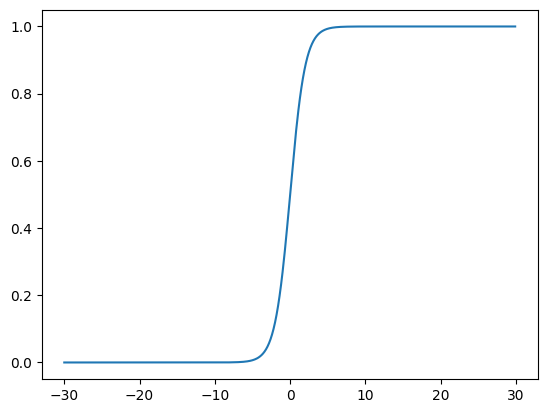

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sig(t):
    return 1/(1 + np.exp(-t))

# graph the sig function
domain = np.arange(-30, 30, 0.1)
plt.plot(domain, sig(domain))

Veamos dos propiedades de las derivadas funcion sigmoid logistic.

$$S'(t) = \frac{\mathrm{e}^{-t}}{(1  + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2(t) \tag{3}  $$
ademas

$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \frac{1}{1 + \mathrm{e}^{-t} } \frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}} = \frac{1}{ 1 + \mathrm{e}^{-t} } \left (  1 -  \frac{1}{1 + \mathrm{e}^{-t}}  \right ) = S(t)(1 - S(t)) \tag{4} $$


Definamos ahora la hipotesis en terminos de esta funcion


$$h(\Theta, x^{(i)}) = S( x^{(i)} \Theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \Theta }} $$

Interpretamos la hipotesis como una probabilidad

$$h(\Theta, x^{(i)}) = p( Y^{(i)} = 1 | x^{(i)} , \Theta) $$
De esta forma
$$h(\Theta, x^{(i)}) = p( Y^{(i)} = 0 | x^{(i)} , \Theta) = 1 -  p( Y^{(i)} = 1 | x^{(i)} , \Theta) $$

Aun asi pareciera que estamos en el continuo. Como podemos usar una hipotesis **discreta**?  La forma puede ser estableciendo un umbral $\gamma=0.5$
y construir una hipotesis binaria


$$
h_{binaria}(\Theta, x^{(i)}) =
\begin{cases}
1 \quad , \quad \text{si } S(x^{(i)} \Theta) > \gamma \\
0 \quad , \quad \text{de lo contrario}
\end{cases}
$$

Lo mencione antes y es muyu importante. Debemos

1. Econtrar la funcion de costo
2. El gradiente de la funcion de costo.

Una forma "ingenua" es pensar en esta funcion de costo


$$J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m [ h_i(\theta, X) - Y_i]^2 $$
Donde $h(\theta, X)$ es la sigmoid. Pero esta no es una buena idea por que es esta no siempre es convexa.

Veamos un ejemplo. Asumamos que la parte lineal de la logistica es $1+ \theta$ y que $y=1$ la funcion de costo solo tiene un termino

$$J(\theta)^{(i)} = \frac12 ( S(1 + \theta) - 1)^2 .$$
Una forma de entender convexidad es hallando la segunda derivada. Si es toda positiva es convexa, si es toda negativa es concava, pero si tiene los dos signos, no es ni concava ni convexa y esto es un problema.

$$\frac{d J(\theta)^{(i)}}{d \theta} = (S(1+\theta)-1) \mathrm{e}^{-1 - \theta} S^2(1 + \theta) = -\mathrm{e}^{-1 - \theta} S^2(1 + \theta)+ S^3(1 + \theta) \mathrm{e}^{-1 - \theta} $$

$$\frac{d^2 J(\theta)}{d \theta^2} = \mathrm{e}^{-1 - \theta
 } S^2(1 + \theta) -2 S^3(1 + \theta) \mathrm{e}^{-2 - 2 \theta} + 3 S^4(1 + \theta) \mathrm{e}^{-2 - 2 \theta} - S^3(1 + \theta) \mathrm{e}^{-1 - \theta}  $$

Esta formula la calculo numericamente

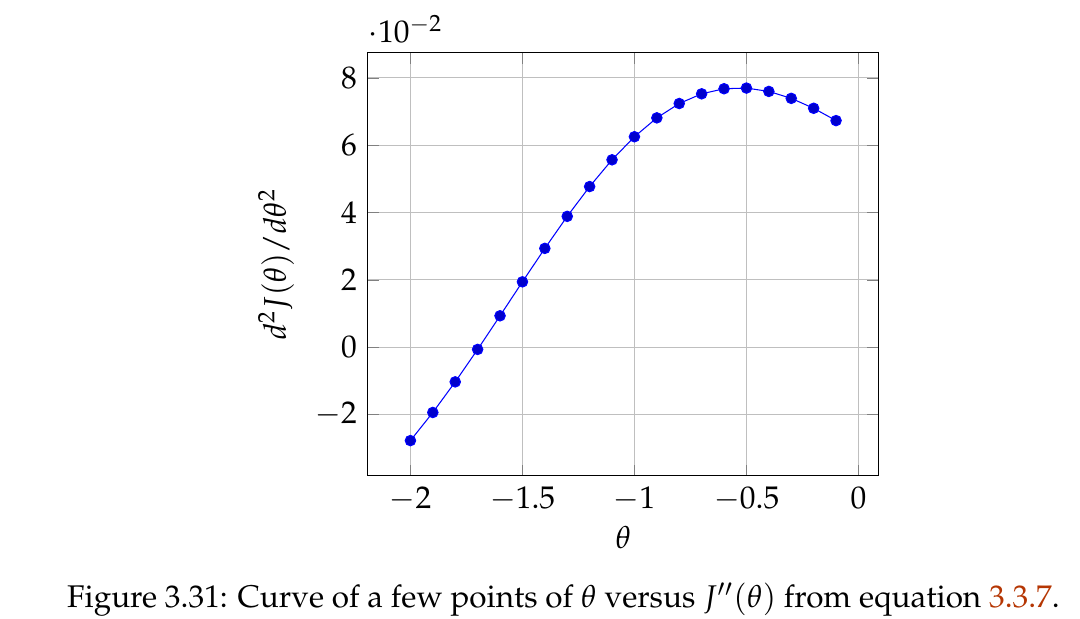

La funcion de costo no es convexa, por que $J''(-2) < 0$, pero $J''(-1)>0$.

Vamos a cambiar la tecnica para hallar la funcion objetivo.

Pensemos en un problema binario (cuando no sea binario lo discutimos mas adelante). Por ejmplo queremos saber si un objeto es un perro o un gato.

$$h(\theta, x^{(i)}) = p( y_i = \text{gato} | x^{(i)}; \theta) = S(x^{(i)} \theta ) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}} \tag{4}$$  La probabilidad de que sea un perro

$$p( y_i = \text{perro}| x^{(i)}, \theta) = 1 - p(y_i = \text{gato} | x^{(i}; \theta)  \tag{5}  $$

Estas dos probabilidades se pueden escribir en una sola.

$$p( y_i | x^{(i)}; \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i} $$

Esto es apenas es para un objeto. Que tal si tenemos una coleccion de objetos. Los objetos son estadisticamente independientes, pues un objeto no puede ser perro y gato a al vez.
La probabilidad de todos ellos es el producto de las probabilidades de cada uno (propiedad de independencia estadistica).

$$\mathcal{L}(\theta) = p(Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i}  $$

La idea es maximizar el **likelihoold** $\mathcal{L}$ (verosimilitud)
Esta funcion es commplicada, entonces tomamos el logaritmo por que convierte productos en sumas. Hallar $\nabla \mathcal{L}$ no es facil.


$$\log \mathcal{L}(\theta) = \log p(Y | X; \theta) = \sum_{i=1}^m
y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ (1 - h(\theta, x^{(i)})]$$
En vez de maximizar queremos minimizar, entonces le cambiamos el signo.

$$J(\theta) = -\sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ (1 - h(\theta, x^{(i)})] \tag{6} $$

Esta funcion es **convexa** (por que?)

2. Hallemos el gradiente de la funcion de costo. Toemos el primer termino y luego el segundo dentro de la suma, al final los sumamos todos.
Usando la ecuacion (4)



$$\frac{\partial y_i \log [ h(\theta, x^{(i)})]}{\partial \theta_k} = y_i \frac{1}{S} S' x_{ik} = y_i \frac{1}{S} S(1-S) x_{ik} = y_i (1 - S) x_{ik}$$

De la misma forma

$$\frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k} = -(1 - y_i) \frac{1}{1 -S} S(1-S) x_{ik}  $$

Sumamos ambos terminos

$$
\frac{\partial y_i \log [ h(\theta, x^{(i)})]}{\partial \theta_k}
+
\frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k}
= y_i (1 - S) x_{ik} + (y_i - 1)  S x_{ik} = y_i x_{ik} - y_I S x_{ik} + y_i S x_{ik} - S x_{ik}= (y_i - S) x_{ik} = -( h(x^{(i)} - y_i) x_{ik}  $$

Ahora hacemos la suma de todos.

$$\frac{\partial J(\theta)}{\partial \theta_k} = \sum_{i=1}^m (h(\theta, x^{(i)}) - y_i) x_{ik} \tag{7} $$

## Frontera de decision (boundary decision)
Recordemos

$$h(\theta, x^{(i)} = S( x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta} } $$

Es una probabilidad. La probabilidad $1/2$ ocurre exactamente cuando
$x^{(i)} \theta = 0$. Para valores negativos $x^{(i)} \theta < 0$ la probabilidad es $p < 1/2$, para valores positivos $x^{(i)} \theta > 0 $, la probabilidad es $p>1/2$.

Veamos la siguiente grafica.


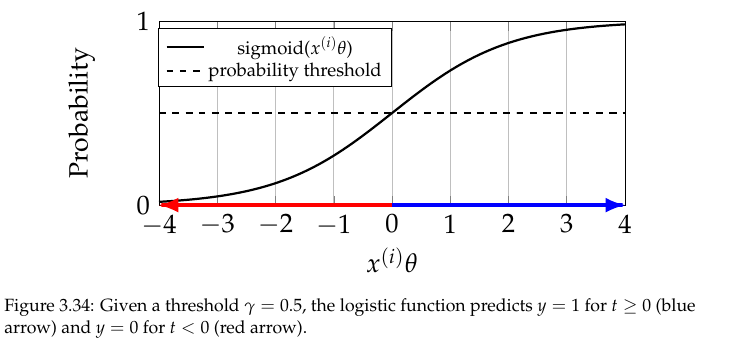

Para nosotros $1/2$ es el umbral (puede ser distinto). La ecuacion

$$x^T \theta = \sum_{i=1}^n x_i \theta_i = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n =  0 $$
define donde esta el umbral $p=1/2$.
Pero esta es la ecuacion de un plano (hiperplano) en $n$ dimensiones.
A este hiperplano lo llamamos **boundary decision**.
Este hiperplano me determina que los que estan a un lado son rojos y los otros azules. Veamos este hiperplano donde esta para un ejemplo numerico.




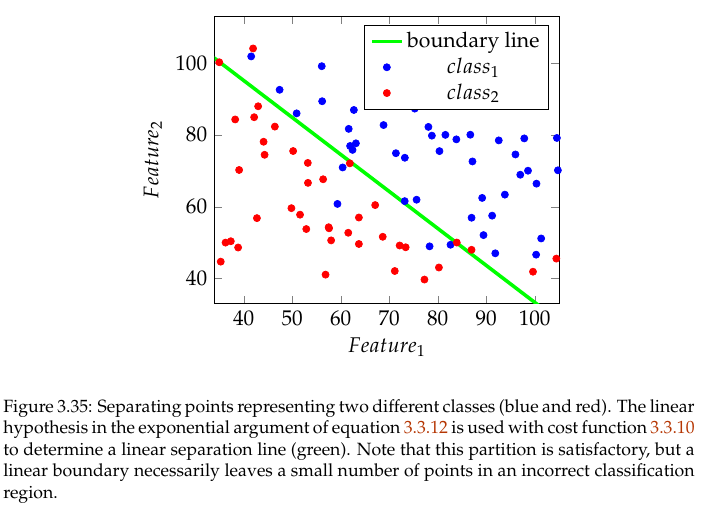

## Como se encuentra el boundary decision line
* Use la hipotesis (4) $h(\theta, x^{(i)})=S(\theta)$, con la funcion de costo (6).

* Use el gradiente (7) para encontrar $\theta$.
* La ecuacion $x^T \theta = 0$ es el **boundary decision**. En $\mathbb{R}^2$ es una linea con en la grafica 3.35, en $\mathbb{R}^3$ es un plano y en $\mathbb{R}^n$ es un hiperplano.



Que pasa si los "clusters" no son **linealmente separables**.
En este caso una recta o plano o hiperplano no le sirve. Entonces puede definir una funcion mas general (un circulo, eliplse, o otra).

Donde se define esta funcion? en el argumento de $h$.
Por ejemplo

$$h(\theta, X) = S ( g(\theta, X) $$
antes $g=x^T \theta$. Ahora $g$ es una funcion no lineal en $\theta$.

Por ejemplo:
El siguiente polinomio de grado 8 en dos variables $x_1, x_2$.

$$g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[i(i+1)/2 +j]}x_2^j x_1^{i-j} $$

Con este polinomio se define la **boundary decision** como $g(\theta, X) =0$. Se puede graficar.
La grafica se ve como en la figura




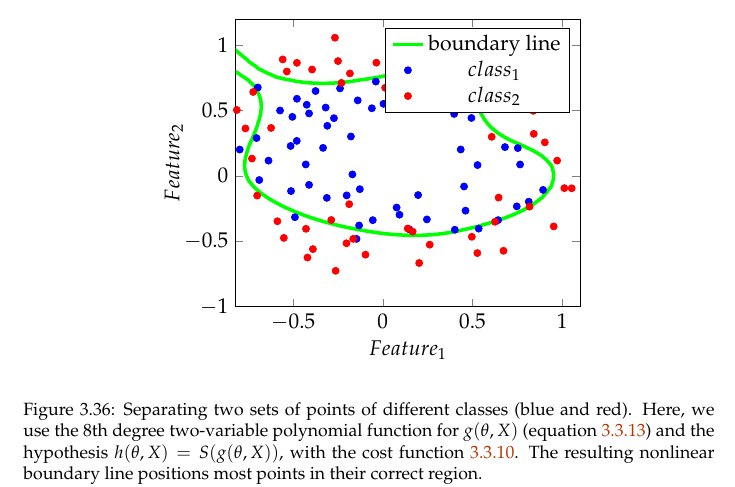

En la zona superior izquierda se e un comportamiento raro. Puede ser sobreajuste. Entonces se puede usar **regularizacion** para curar este problema.

### Regularizacion (revisited) volviendo a visitar.
Podemos poner una funcion **penalty** para disminuir el sobreajuste.



$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ (1 - h(\theta, x^{(i)})]  +  \frac{\lambda}{2m} \| \theta \|^2 $$

Con esta funcion de costo regularizada la Figura 3.36 queda

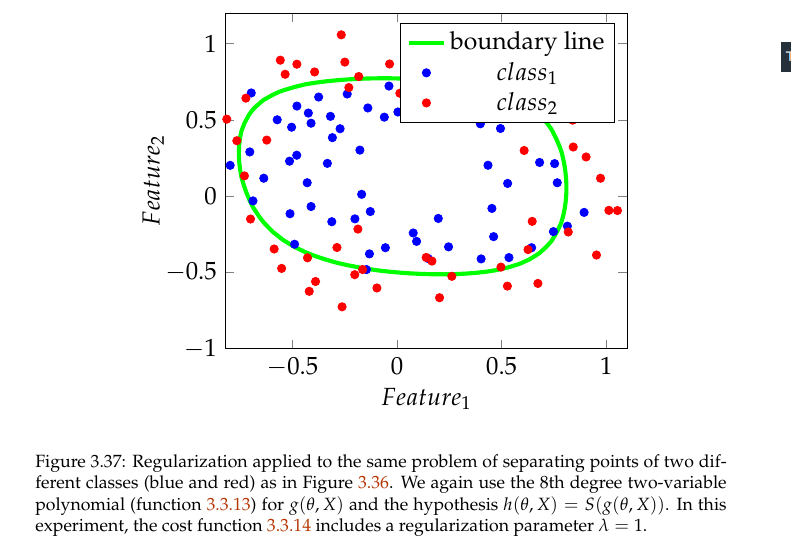

# Clasificacion Muticlase
Discutimos antes que no todo es "blanco y nego", "1 y 0", o "verdadero falso", etc. Estas son variables binarias. Pero, que tal si tenemos 3 clases o mas?

En la proxima clase:

* Sofmax regression
* one-hot encoding
* one-vs-all (uno versus el resto)

y mostramos metodos para calibrar la precision de la claficacion.